In [ ]:
data['change']=data['Close']-data['Close'].shift(1)  
# data['pos'] = wealthy
data['pct'] = data.Close.pct_change(1).fillna(0)
# data['pos'][data['15d']>=data['50d']]=1000
data.loc[data['15d']>=data['50d'], 'pos']=1000
data.loc[data['15d']>=data['50d'], 'flag']=1

data['flag'].fillna(0, inplace=True)
data['pos'].fillna(0, inplace=True)
# data.loc[data.crossBuy>0,'flag'] = 
# data.loc[data.crossSell>0,'flag'] =
strategy_rate = data.pct * data['flag']
nav = (1+strategy_rate).cumprod()
cumrate = nav - 1
totalprofit = nav[len(nav)-1] - 1
data['pnl']=data.pos*data.change
data['cumpnl']=data['pnl'].cumsum()
data['cumrate']=cumrate
data

In [ ]:
totalprofit

两种回撤算法：
一种用每天统计的收益率汇总
一种 用实际账户出入情况

In [ ]:
# 导入相关模块
import tushare as ts
import pandas as pd

# 获取数据
df = ts.get_k_data("000725")

# 处理数据
df.index = pd.to_datetime(df.date)
#df.drop("date", axis=1, inplace=True)

# 计算浮动比例
df["pchange"] = df.close.pct_change()
# 计算浮动点数
df["change"] = df.close.diff()

# 查看当前数据数据前五行
#              open  close   high    low      volume    code   pchange  change
# date                                                                        
# 2015-07-20  4.264  4.234  4.342  4.165  13036186.0  000725       NaN     NaN
# 2015-07-21  4.136  4.195  4.274  4.096   8776773.0  000725 -0.009211  -0.039
# 2015-07-22  4.175  4.146  4.214  4.067   9083703.0  000725 -0.011681  -0.049
# 2015-07-23  4.136  4.254  4.283  4.096  12792734.0  000725  0.026049   0.108
# 2015-07-24  4.224  4.136  4.254  4.106  13009620.0  000725 -0.027739  -0.118

# 设定回撤值
withdraw = 0.03
# 设定突破值
breakthrough = 0.03
# 设定账户资金
account = 10000
# 持有仓位手数
position = 0

def buy(bar):
    global account, position
    print("{}: buy {}".format(bar.date, bar.close))
    # 一手价格
    one = bar.close * 100
    position = account // one
    account = account - (position * one)

def sell(bar):
    global account, position
    # 一手价格
    print("{}: sell {}".format(bar.date, bar.close))
    one = bar.close * 100
    account += position * one
    position = 0

print("开始时间投资时间: ", df.iloc[0].date)
for date in df.index:
    bar = df.loc[date]
    if bar.pchange and bar.pchange > breakthrough and position == 0:
        buy(bar)
    elif bar.pchange and bar.pchange < withdraw and position > 0:
        sell(bar)

print("最终可有现金: ", account)
print("最终持有市值: ", position * df.iloc[-1].close * 100)

# 1st Meeting programme
+ Date: Friday, 11 Jan 2019
+ Time: 3.00pm to 5.00pm
+ Venue: Project Room 5-8, LKSLIB
___
## Personal Profile
### the programming ability
### what u hope to gain in the end or in long term
### if any, recommand some good reference
___
## Sharing--General knowledge about quantitative investing in reality
### five core element

#### tradeable financial product 
+ stock, bond, fund, option, fx, future)

#### historical data 
+ high freq: time interval less than 0.5 s
+ low freq: interval more than 1 minitue
####  investing strategy
+ when to buy, what product to buy, at what price
#### computer programming
#### platform for backtesting and trading

### strategy classfication
#### product classfication: stock, CTA(mainly for option), option, FOF
#### arbitrage ( the core is Mean Reversion, event-driven,fx/ bond）, hedge （core is risk management, buy / sell stock/index future.
#### trading signal: multi-factor, mean-reversion, momentum, machine learning
### strategy implementation steps
#### global parameter
+ frequency to change postion
+ postion number
+ backtesting time interval
+ inital_value
+ data
#### local parameter
+ data pool
+ fees
#### trading parameter
+ signal operation

### common platform used
* quantopian (platform for backtesting strategy)
___
## Discussing
### which part to focus on
+ we can use well-build platform, more data, friendly outlook, 
+ we build our own, starting from basic one

### how do we organize

# Task 1 Description
+ Data: Using data from Dr.Zhao\`s lectures, S3-5, named `CC3.SI.csv`.
+ Time interval: The same as the data\`s
+ Strategy: When the MA5 crossing 
    + when 15 MA exceed 50 MA, immediately buy the stock (no delay)
    + when 50 MA exceed 15 MA, immediately sell the stock (no delay)

+ Requried outcome
    + Complusory: Plot the date (on the x axis) vs net value (on the y axis). 
    + option: Show daily the transactions log & daily postion value
+ Using two methods
     + fix the each trade postion: number of share of each time is 1000
     + fix the initial value: 10000

## The original code

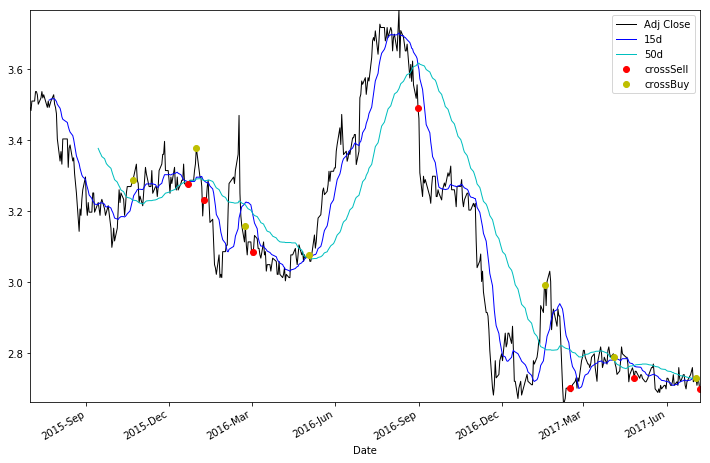

In [72]:
# Moving Average Crossover 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams["figure.figsize"]=[12,8] # (optional)
data=pd.read_csv('CC3.SI.csv',index_col=0,parse_dates=True)
data.drop(data.index[data['Volume']==0],inplace=True)
data['15d']= np.round(data['Adj Close'].rolling(window=15).mean(),3)
data['50d']= np.round(data['Adj Close'].rolling(window=50).mean(),3)
x=data['15d']-data['50d']
x[x>0]=1
x[x<=0]=0
y=x.diff()
idxSell=y.index[y<0]
idxBuy=y.index[y>0]
data['crossSell']=np.nan
data.loc[idxSell,'crossSell']=data.loc[idxSell,'Adj Close']
data['crossBuy']=np.nan
data.loc[idxBuy,'crossBuy']=data.loc[idxBuy,'Adj Close']
fig, ax = plt.subplots()
data[['Adj Close', '15d', '50d','crossSell','crossBuy']].plot(
        ax=ax,
        style=['k-','b-','c-','ro','yo'],
        linewidth=1)

plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
plt.show()